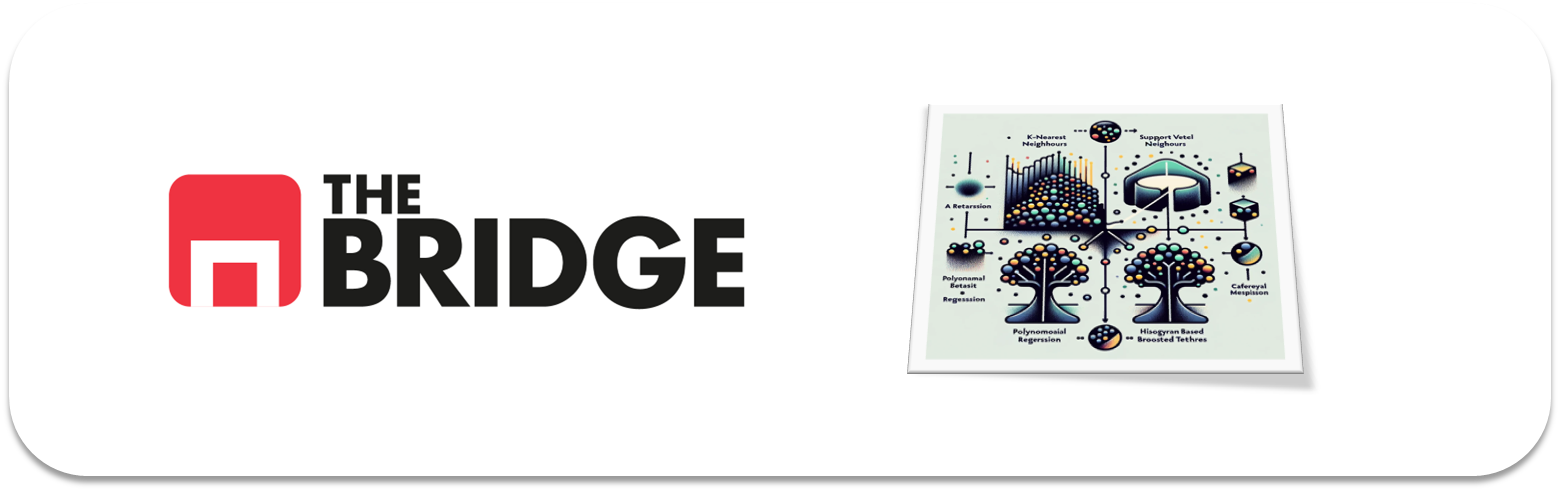

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [91]:
import funciones as fn
import TOOLBOX_1 as tl

from imblearn.over_sampling import SMOTE
from IPython.display import display
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [45]:
df = pd.read_csv('data\wines_dataset.csv',sep = '|')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [47]:
fn.crea_df_std(df)

,name,type,prio,card,card%,NaN,Unknown,%_NaN,Category
0,fixed acidity,float64,3,106,1.63,0,0,0.0,Numérica Continua
1,volatile acidity,float64,3,187,2.88,0,0,0.0,Numérica Continua
2,citric acid,float64,3,89,1.37,0,0,0.0,Numérica Continua
3,residual sugar,float64,3,316,4.86,0,0,0.0,Numérica Continua
4,chlorides,float64,3,214,3.29,0,0,0.0,Numérica Continua
5,free sulfur dioxide,float64,3,135,2.08,0,0,0.0,Numérica Continua
6,total sulfur dioxide,float64,3,276,4.25,0,0,0.0,Numérica Continua
7,density,float64,3,998,15.36,0,0,0.0,Numérica Discreta
8,pH,float64,3,108,1.66,0,0,0.0,Numérica Continua
9,sulphates,float64,3,111,1.71,0,0,0.0,Numérica Continua


Atendiendo a los requerimientos para los diferentse target y a los significados de cada una tenemos: una variable cat para predecir la calidad que sería, la columna categórica "quality"; y otra numérica continua que es "alcohol" para saber el % de alcohol que tendrá

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


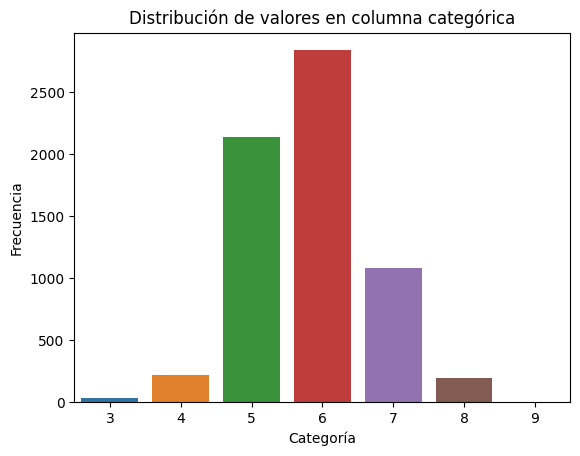

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [48]:
# Vamos a echar un ojo a las distribuciones

target_1 = 'quality'
target_2 = 'alcohol'


sns.countplot(x=target_1, data=df)
plt.title('Distribución de valores en columna categórica')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

df[target_1].value_counts()

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


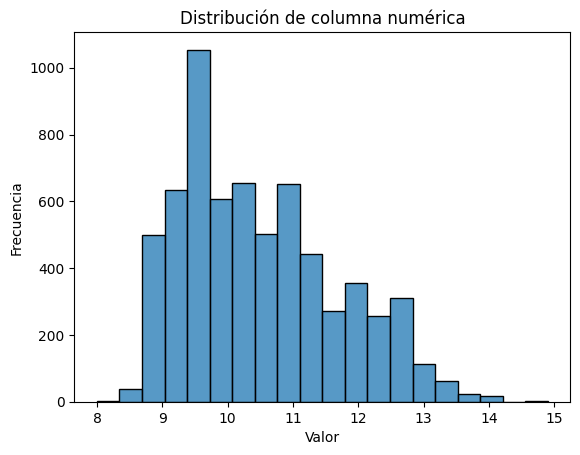

In [49]:
sns.histplot(df[target_2], kde=False, bins=20)
plt.title('Distribución de columna numérica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

La distribución de valores de la columna categórica es bastante desigual, siguiente una distribución seudo normal. Podríamos tratarlo como una columna numérica y finalmente asociarle el valor más cercano. O también podríamos hacer un smote, pero hay valores como 0, 1 o 2 que nisiquiera hay resultados, y del 9 hay muy pocos, lo que sugiere que sería bastante dificicil tener muestras similares, por cualquiera de las técnicas. Así que la trataremos como numérica. 

Por otro lado, la columna del grado de alcohol es claramente numérica. y sigue una distribución normal desplazada, si es que eso existe.

Veamos ahora las distribuciones de las otras variables. Para ello usaremos las funciones del team challenge. 

In [50]:
#Vamos a convertir los valores de class a 0 para white y 1 para red.

df['class'] = df['class'].map({'white': 0, 'red': 1})

#Ahora definimos las features para cada modelo.

f_target_1 = df.columns.tolist()
f_target_1.remove(target_1)
f_target_2 = df.columns.tolist()
f_target_2.remove(target_2)

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

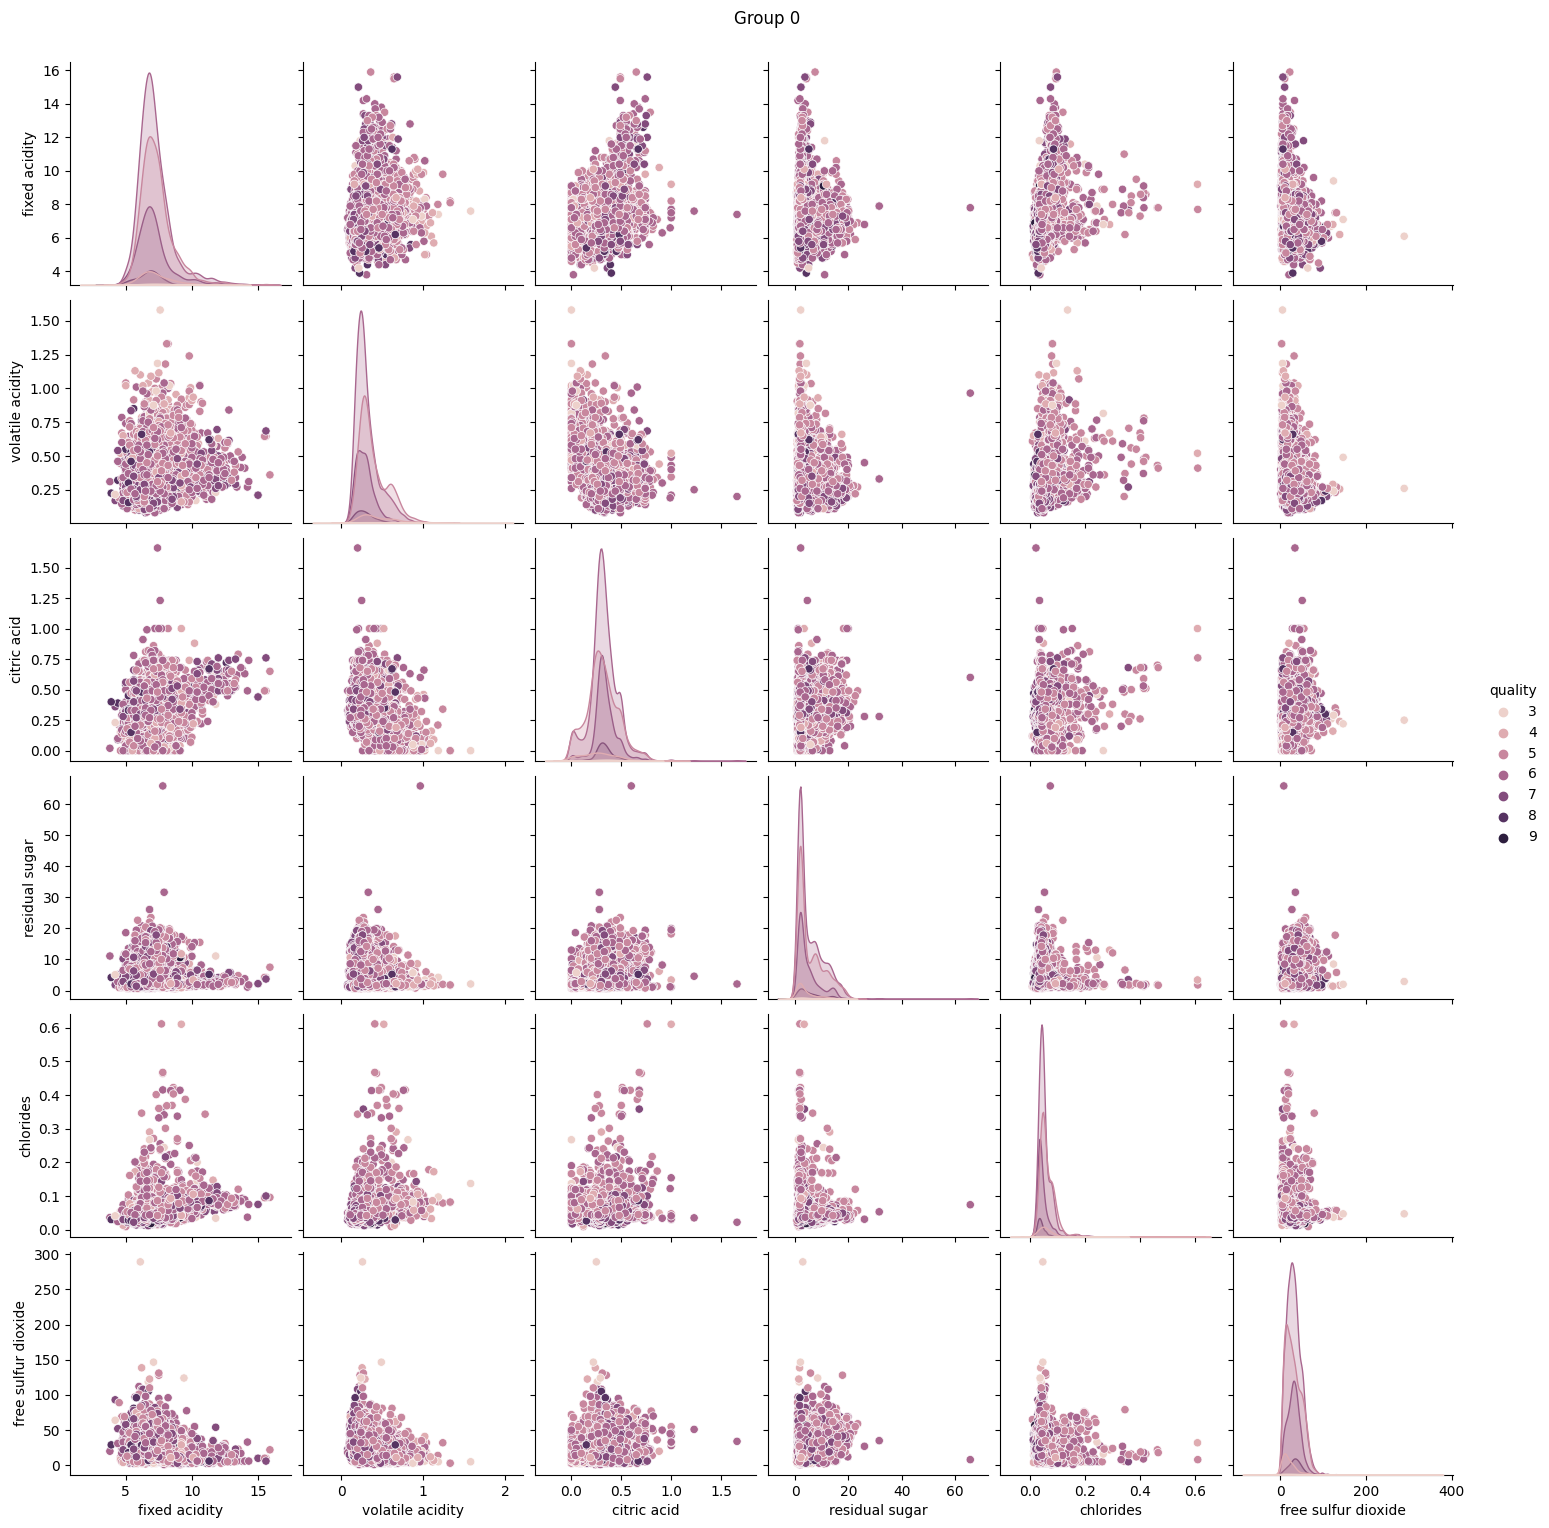

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

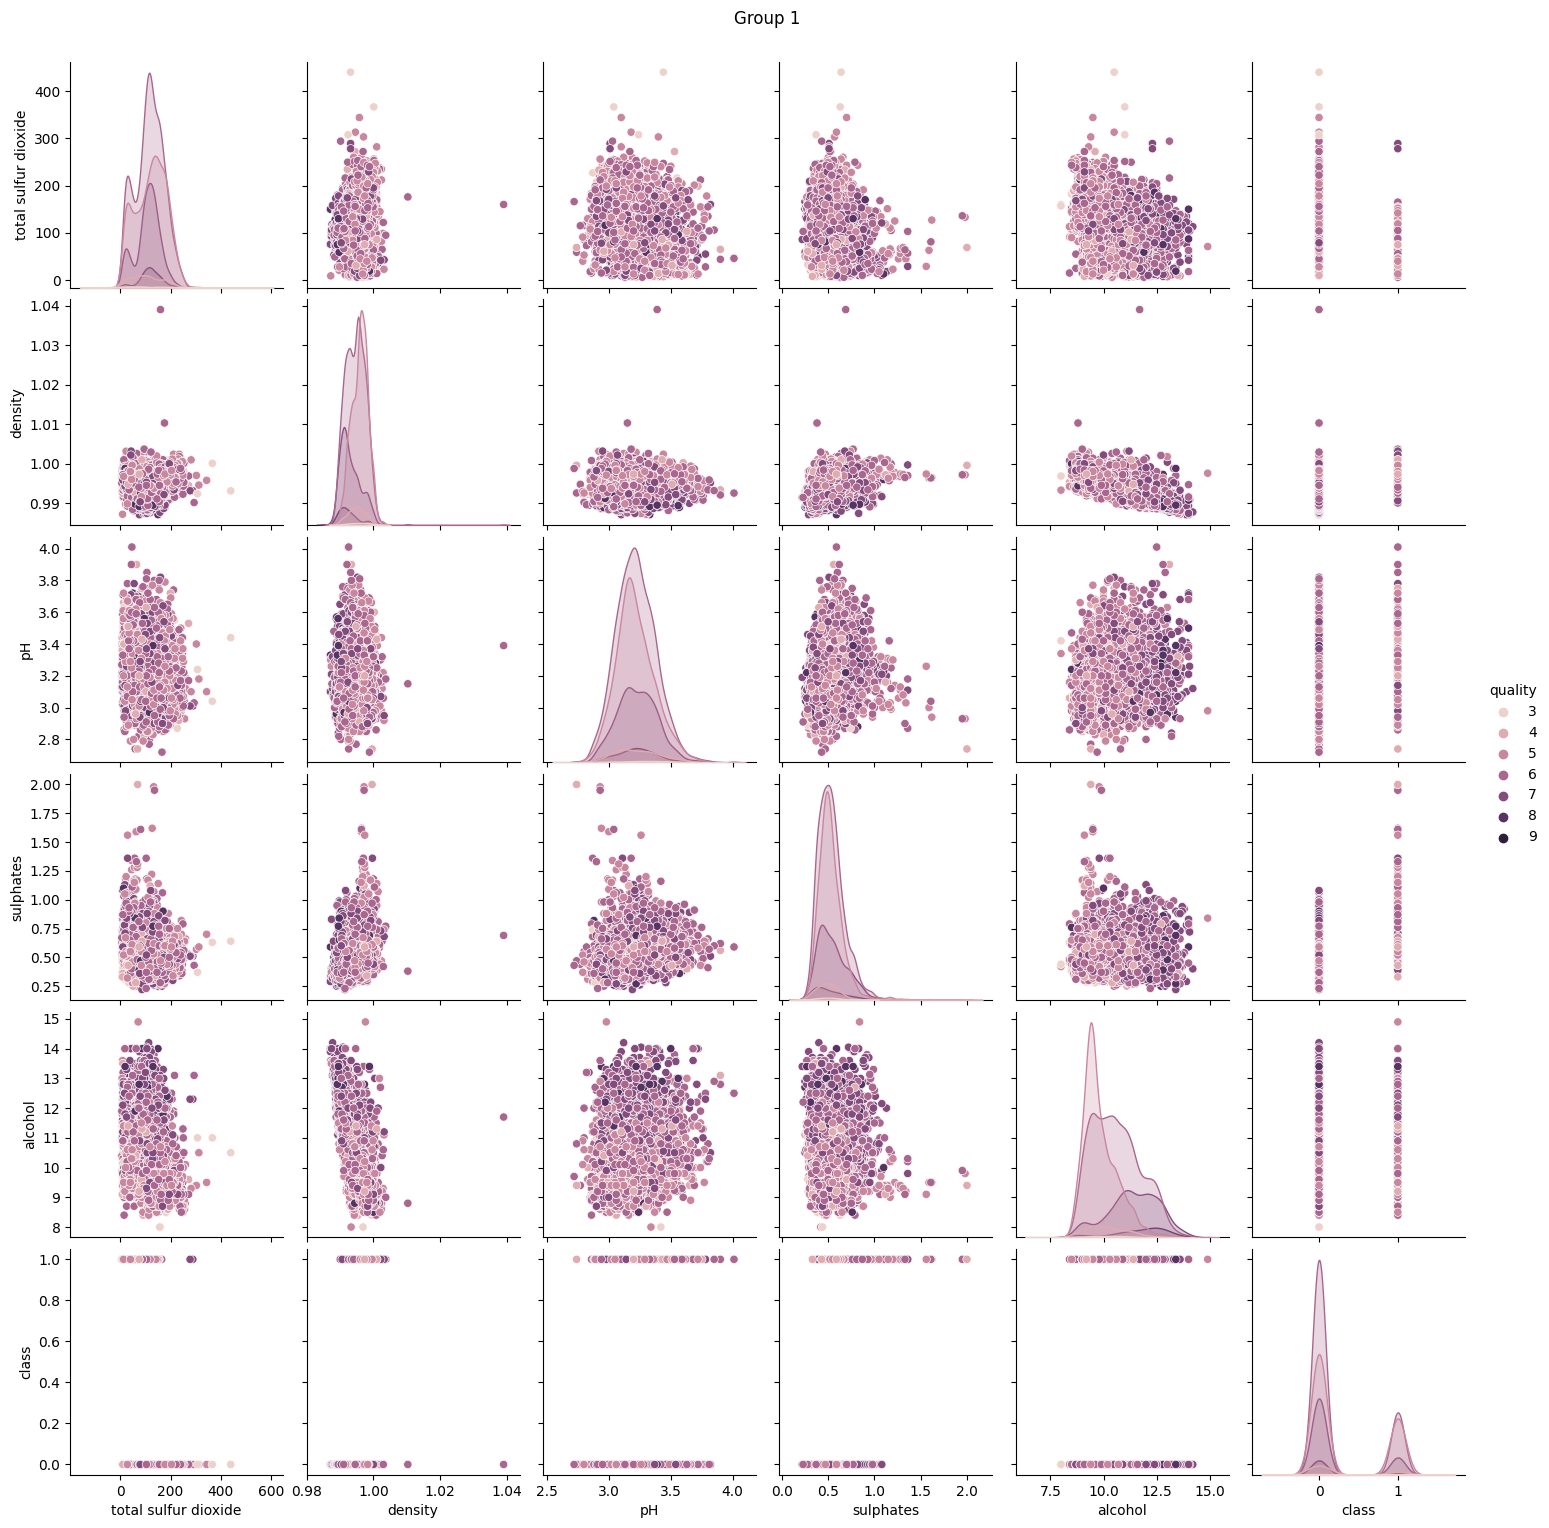

('Las columnas con un mayor umbral_corr al establecido son',
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'class'])

In [51]:
tl.plot_features_num_regression(df, target_1, columns=f_target_1)

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

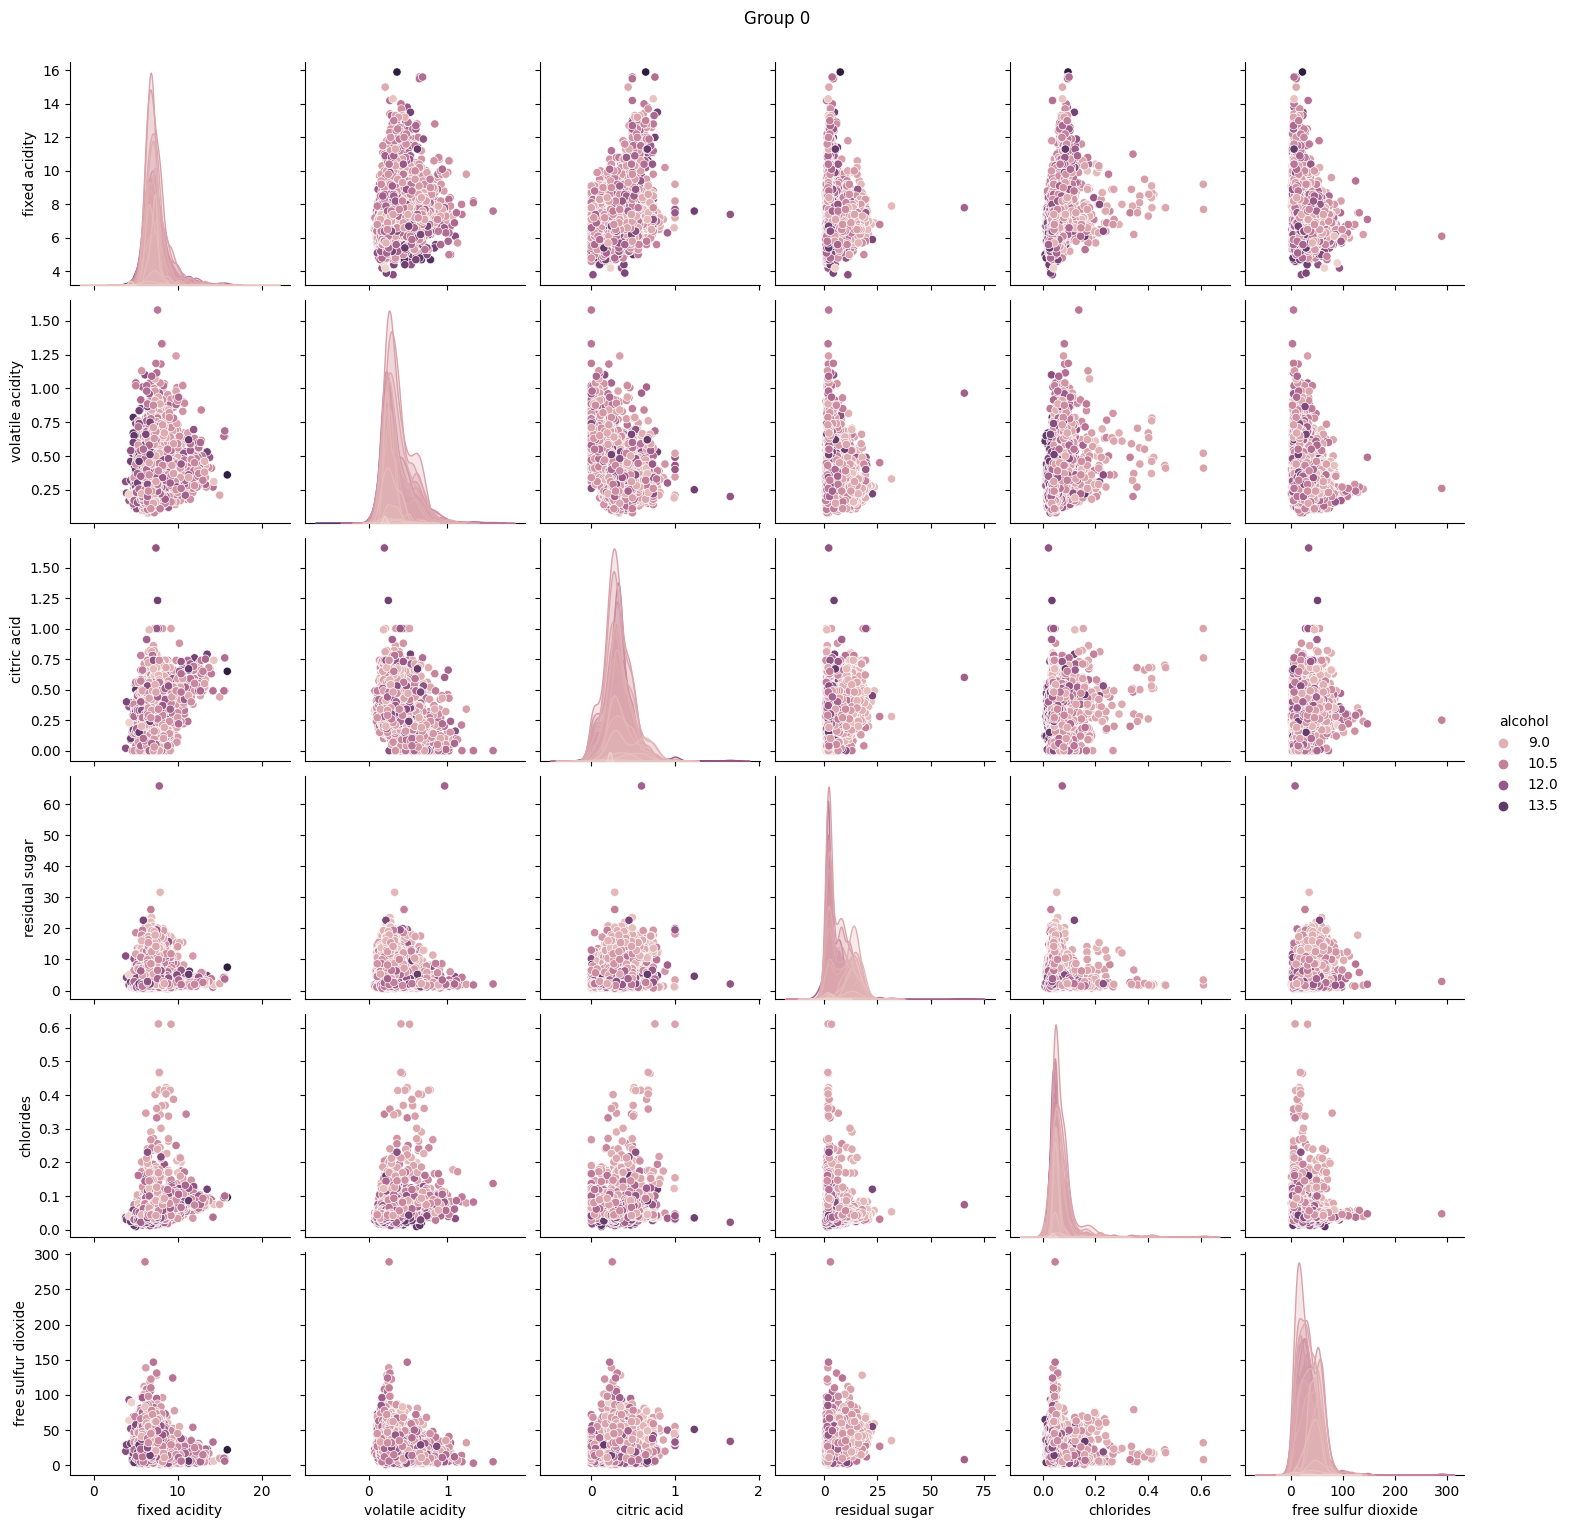

c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

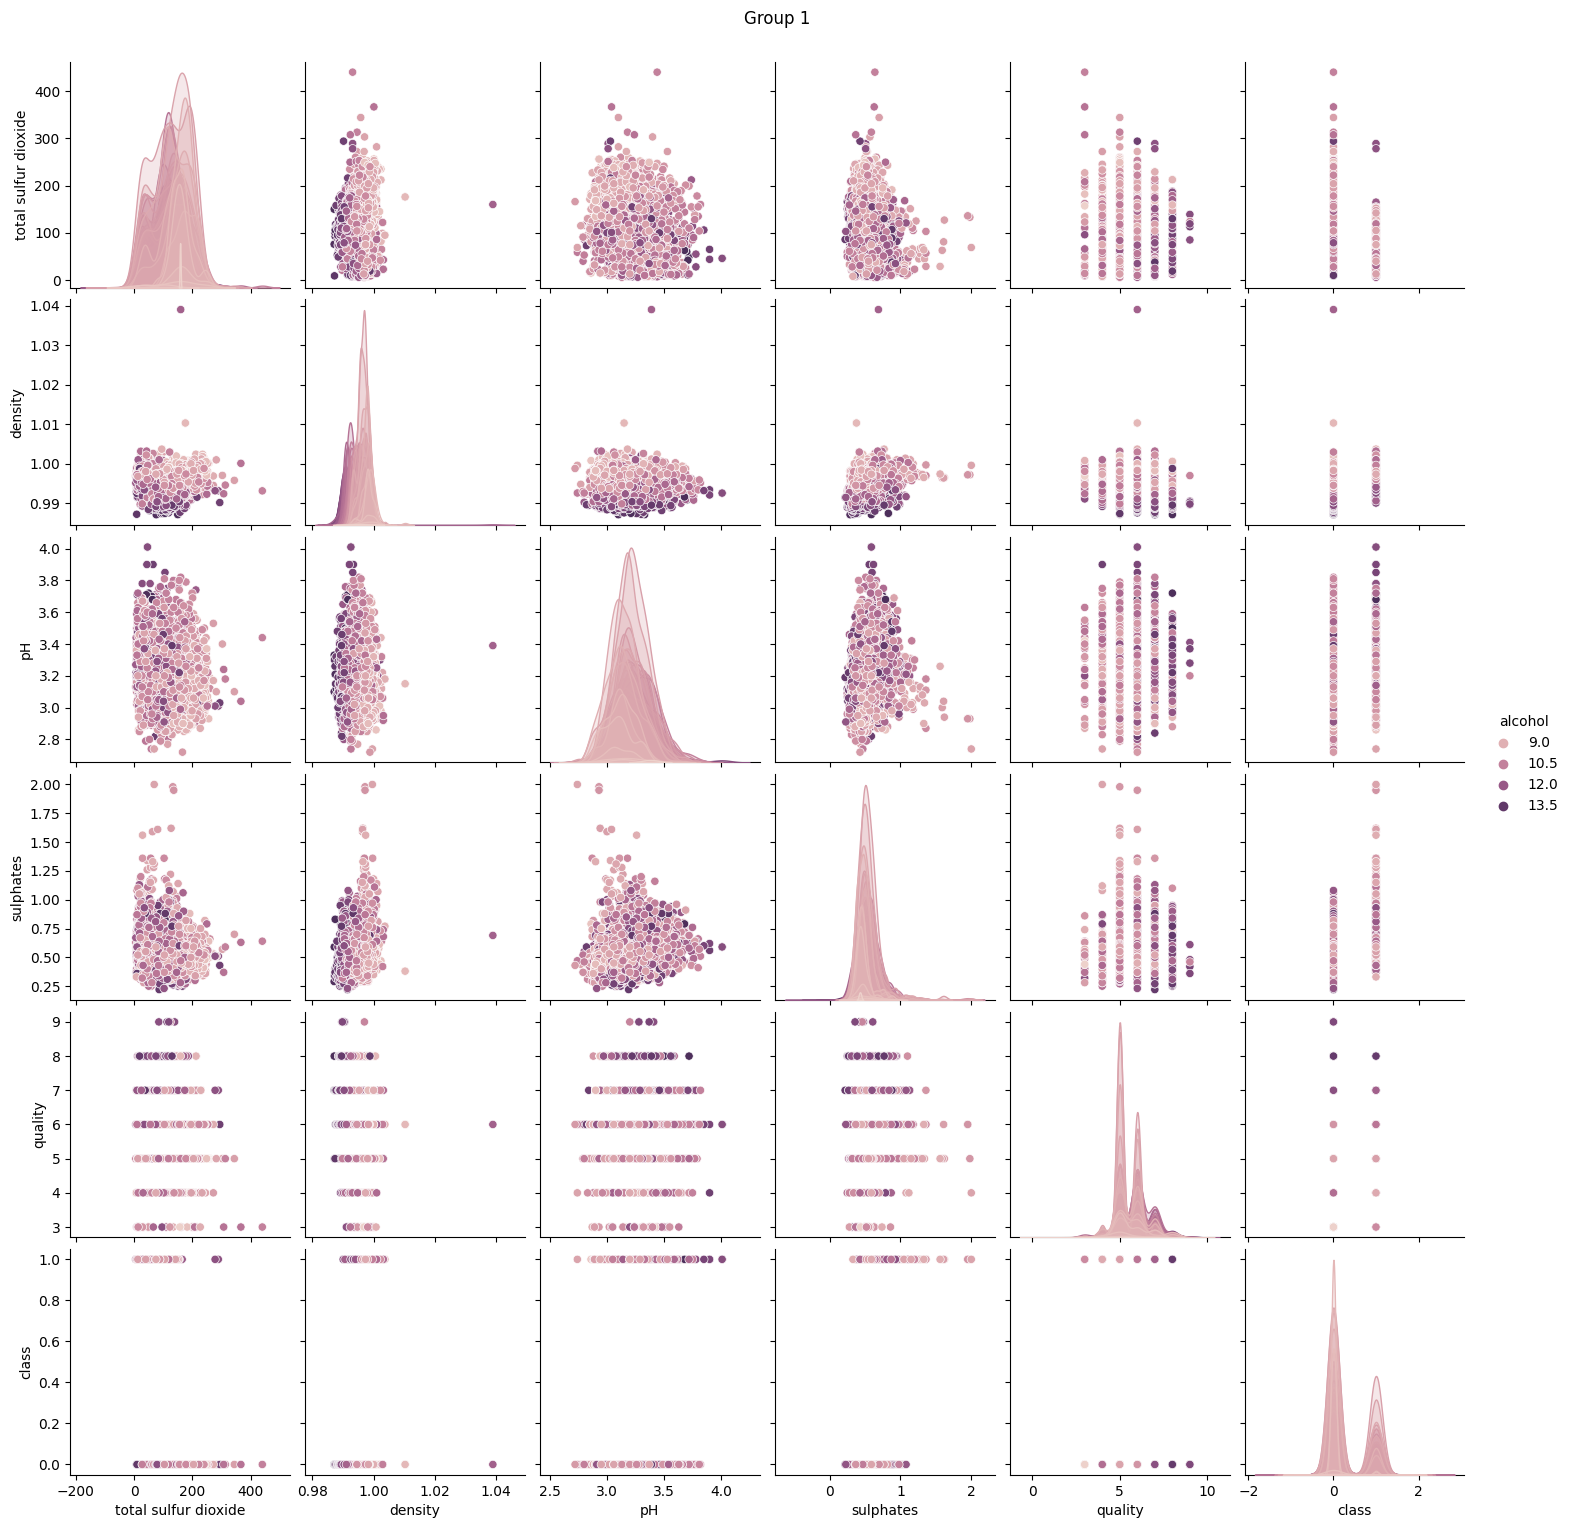

('Las columnas con un mayor umbral_corr al establecido son',
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'quality',
  'class'])

In [52]:
tl.plot_features_num_regression(df, target_2, columns=f_target_2)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

Ya que lo tenemos que considerar un problema de clasificación aunq opino que con una regresión saldría mejor por lo que hemos dicho antes. Vamos a hacer un smote y vamos a asimilar las fialas de la categoría 9 a la 8, dado que con 5 valores no tiene sentido hacer predicciones, ni generar datos sintéticos.

In [56]:
df[target_1] = df[target_1].replace(9, 8)

In [57]:
# Una vez tenemos el df limpio separamos la target del resto.
X = df.drop(target_1, axis=1) 
y = df[target_1]

# Luego separamos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [93]:
# Escalar las características: Tanto smote como KNN son sonsibles a la escala, 
# por lo que es importante que todas las características estén en la misma escala.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Vamos a equilibrar los valores del target creando nuevos datos sintéticos con SMOTE
smote = SMOTE(random_state=5)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [95]:
#Vamos con el modelo KNN
# Entrenamos los modelos KNN.
knn_1 = KNeighborsClassifier(n_neighbors=3)
knn_1.fit(X_train_smote, y_train_smote)

knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=10)

In [74]:
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision_weighted': make_scorer(precision_score, average='weighted'),
#            'recall_weighted': make_scorer(recall_score, average='weighted'),
#            'f1_weighted': make_scorer(f1_score, average='weighted')}

In [97]:
y_pred_knn_1 = cross_val_predict(knn_1, X_train_smote, y_train_smote, cv = 5)

report_1 = classification_report(y_train_smote, y_pred_knn_1)
print(report_1)

# scores_1 = cross_validate(knn_1, X_train_scaled, y_train_smote, cv=5, scoring=scoring)
# print(f"KNN CV Metrics:")
# for key, value in scores_1.items():
#     print(f"{key}: {value.mean()}")

              precision    recall  f1-score   support

           3       0.95      1.00      0.97      2273
           4       0.85      0.99      0.91      2273
           5       0.72      0.70      0.71      2273
           6       0.70      0.40      0.50      2273
           7       0.80      0.92      0.85      2273
           8       0.90      0.99      0.95      2273

    accuracy                           0.83     13638
   macro avg       0.82      0.83      0.82     13638
weighted avg       0.82      0.83      0.82     13638



In [98]:
y_pred_knn_2 = cross_val_predict(knn_2, X_train_smote, y_train_smote, cv = 5)

report_2 = classification_report(y_train_smote, y_pred_knn_2)
print(report_2)


              precision    recall  f1-score   support

           3       0.89      1.00      0.94      2273
           4       0.77      0.98      0.86      2273
           5       0.69      0.59      0.63      2273
           6       0.63      0.27      0.38      2273
           7       0.72      0.80      0.76      2273
           8       0.81      0.99      0.89      2273

    accuracy                           0.77     13638
   macro avg       0.75      0.77      0.74     13638
weighted avg       0.75      0.77      0.74     13638



Como vemos, el recall medio sale mejor con un valor de k menor. No obstante, si nos fijamos capta mejor los valores de los que había menos representación y de los que hemos creado valores sintéticos. Habrá que probar contra el test, pero a priori no huele muy bien. 

In [86]:
#Ahora vamos a hacerlo lo propioi con un random forest.

rf = RandomForestClassifier(n_estimators=500, random_state=5, class_weight='balanced_subsample')    # Colocamos el class_weight en balanced porque tenemos una muestra desbalanceada

y_perd_rf = cross_val_predict(rf, X_train, y_train, cv= 5)

report_3 = classification_report(y_train, y_perd_rf)

print(report_3)     # Aun así, no parece que hayamos tenido demasiado éxito...


              precision    recall  f1-score   support

           3       0.00      0.00      0.00        26
           4       0.69      0.10      0.18       176
           5       0.71      0.70      0.71      1708
           6       0.63      0.79      0.70      2273
           7       0.73      0.48      0.58       843
           8       0.88      0.33      0.48       171

    accuracy                           0.67      5197
   macro avg       0.61      0.40      0.44      5197
weighted avg       0.68      0.67      0.65      5197



In [100]:
#Vamos con la Regresión logística. 

log_reg = LogisticRegression(max_iter=10000, random_state=5)

y_pred_log_reg = cross_val_predict(log_reg, X_train_smote, y_train_smote, cv=5)    #vamos a probar con los datos sintéticos y sin ellos

report_3 = classification_report(y_train_smote, y_pred_log_reg)
print(report_3)

              precision    recall  f1-score   support

           3       0.53      0.56      0.55      2273
           4       0.48      0.51      0.50      2273
           5       0.44      0.46      0.45      2273
           6       0.34      0.23      0.27      2273
           7       0.36      0.31      0.34      2273
           8       0.42      0.54      0.47      2273

    accuracy                           0.44     13638
   macro avg       0.43      0.44      0.43     13638
weighted avg       0.43      0.44      0.43     13638



In [101]:
#Vamos con SVc

svc = SVC(kernel='linear', C=1, random_state=42)

y_pred_svc = cross_val_predict(svc, X_train_smote, y_train_smote, cv = 5)

report_4 = classification_report(y_train_smote, y_pred_svc)
print(report_4)

              precision    recall  f1-score   support

           3       0.51      0.57      0.54      2273
           4       0.49      0.51      0.50      2273
           5       0.43      0.49      0.45      2273
           6       0.35      0.20      0.25      2273
           7       0.37      0.33      0.35      2273
           8       0.44      0.53      0.48      2273

    accuracy                           0.44     13638
   macro avg       0.43      0.44      0.43     13638
weighted avg       0.43      0.44      0.43     13638



Parece que ha ganado el KNN con n_vecinos bajo. con un recall de 0.88 de media. Vamos a intentar optimizar los parámetros.

In [107]:
# # Definir el espacio de búsqueda de hiperparámetros
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
#     'weights': ['uniform', 'distance'],  # Peso de los votos
#     'metric': ['euclidean', 'manhattan']  # Métrica de distancia
# }

In [120]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

In [121]:
grid_search = GridSearchCV(knn_1, param_grid, cv=5, scoring='recall_macro', verbose=1, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall_macro', verbose=1)

In [122]:
# Mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score obtenido
print("Mejor score de validación cruzada (recall_macro):", grid_search.best_score_)

# Mejor estimador
best_model = grid_search.best_estimator_
best_model

Mejores parámetros: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mejor score de validación cruzada (recall_macro): 0.868248696971164


KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=3, p=1,
                     weights='distance')

In [126]:
#Ahora probamos contra el test
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

recall = recall_score(y_test, y_pred, average='macro')

print("Recall:", recall)

              precision    recall  f1-score   support

           3       0.00      1.00      0.01         4
           4       0.00      0.00      0.00        40
           5       0.67      0.00      0.01       430
           6       0.00      0.00      0.00       563
           7       0.00      0.00      0.00       236
           8       0.00      0.00      0.00        27

    accuracy                           0.00      1300
   macro avg       0.11      0.17      0.00      1300
weighted avg       0.22      0.00      0.00      1300

Recall: 0.1674418604651163


c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jcrub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classif

Como vemos, el KNN ajustado mejora en 3 puntos y medio el valor anterior. En el cross_validation. Entiendo que el Aumentar el número de hyperparámetros que se pureban no ha mejorado apenas el recall. 

Pero si probamos contra el test, vemos que solo acierta la clase que menos ejemplos tenía. no tiene mucho sentido. Probablemente sea precisamente el valor de n_vecinos tan bajo.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.